In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [72]:
df = pd.read_csv('brain_stroke.csv')

In [26]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [52]:
df['avg_glucose_level'].describe().transpose()

count    4981.000000
mean      105.943562
std        45.075373
min        55.120000
25%        77.230000
50%        91.850000
75%       113.860000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [54]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [58]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [60]:
df.duplicated().sum()

0

In [62]:
print(f"1 means have stroke, 0 means haven't stroke\n{df['stroke'].value_counts()}")

1 means have stroke, 0 means haven't stroke
stroke
0    4733
1     248
Name: count, dtype: int64


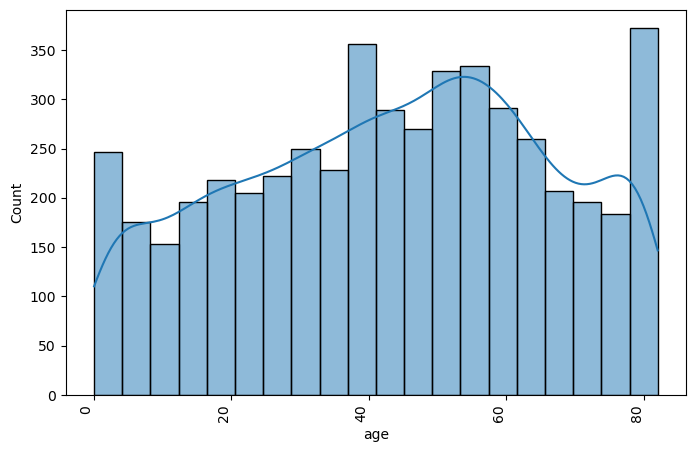

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True)
plt.xticks(rotation=90, ha="right")
plt.show()

<Figure size 600x500 with 0 Axes>

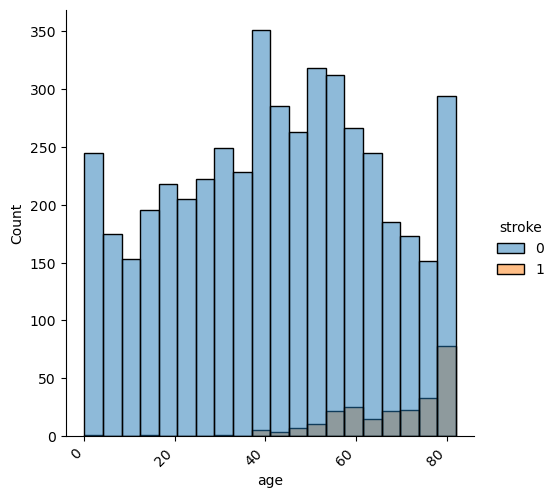

In [10]:
plt.figure(figsize=(6, 5))
sns.displot(data=df, x="age", hue="stroke",bins=20)
plt.xticks(rotation=45, ha="right")
plt.show()

<Axes: ylabel='Density'>

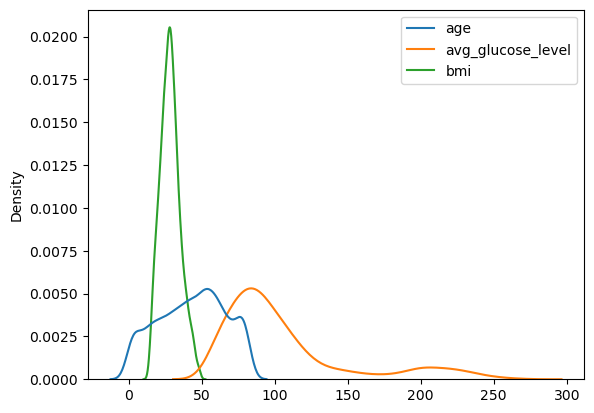

In [24]:
numerical_data = df[['age','avg_glucose_level','bmi']]
sns.kdeplot(data=numerical_data)

([0, 1, 2, 3],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Self-employed'),
  Text(2, 0, 'Govt_job'),
  Text(3, 0, 'children')])

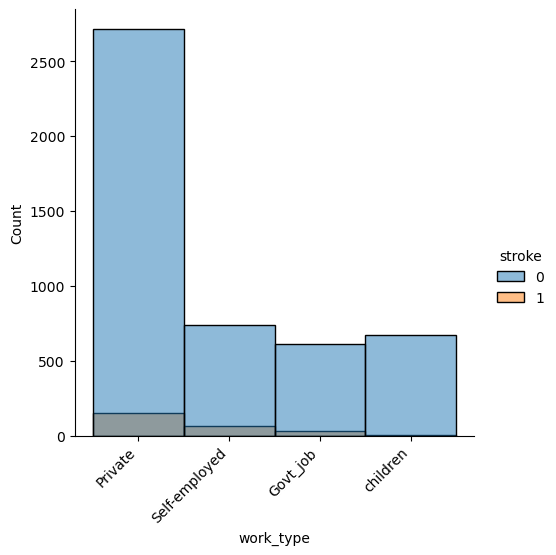

In [26]:
sns.displot(data=df, x="work_type", hue="stroke",bins=20)
plt.xticks(rotation=45, ha="right")

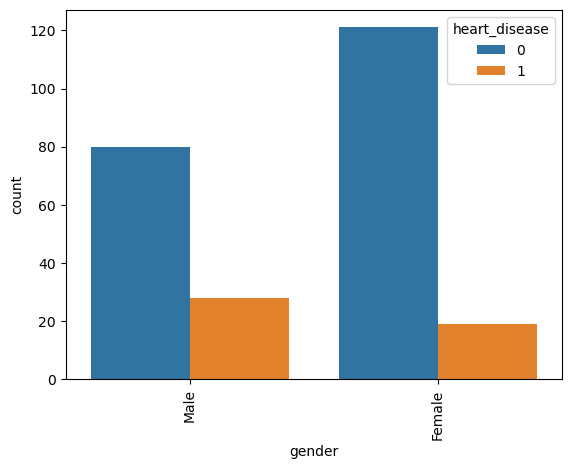

In [28]:
dff = df[df['stroke']==1]
sns.countplot(x='gender', data = dff,hue='heart_disease')
plt.xticks(rotation = 90)
plt.show()

In [30]:
df['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

([0, 1], [Text(0, 0, 'Urban'), Text(1, 0, 'Rural')])

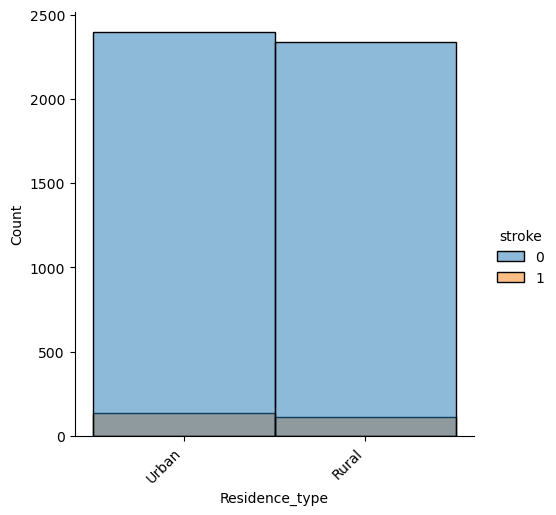

In [32]:
sns.displot(data=df, x="Residence_type", hue="stroke",bins=20)
plt.xticks(rotation=45, ha="right")

([0, 1, 2, 3],
 [Text(0, 0, 'formerly smoked'),
  Text(1, 0, 'never smoked'),
  Text(2, 0, 'smokes'),
  Text(3, 0, 'Unknown')])

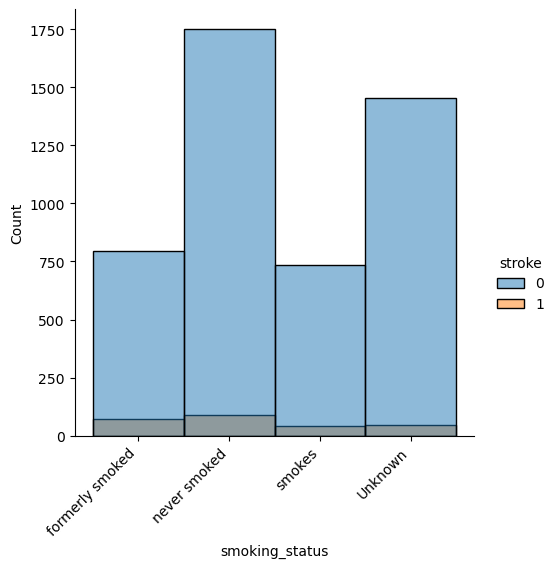

In [34]:
sns.displot(data=df, x="smoking_status", hue="stroke",bins=20)
plt.xticks(rotation=45, ha="right")

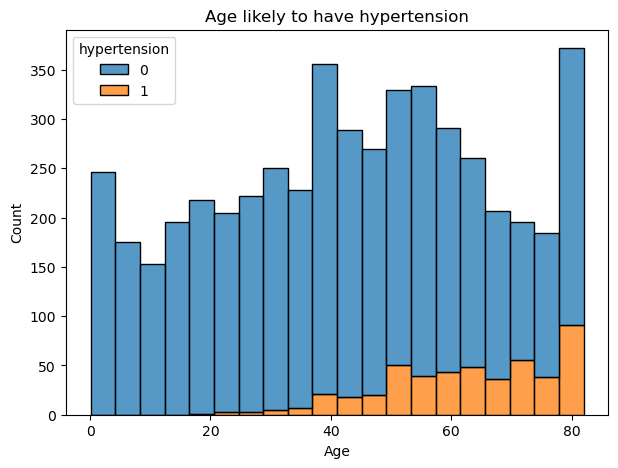

In [36]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='age', hue = 'hypertension',multiple = 'stack')
plt.title("Age likely to have hypertension")
plt.xlabel("Age");

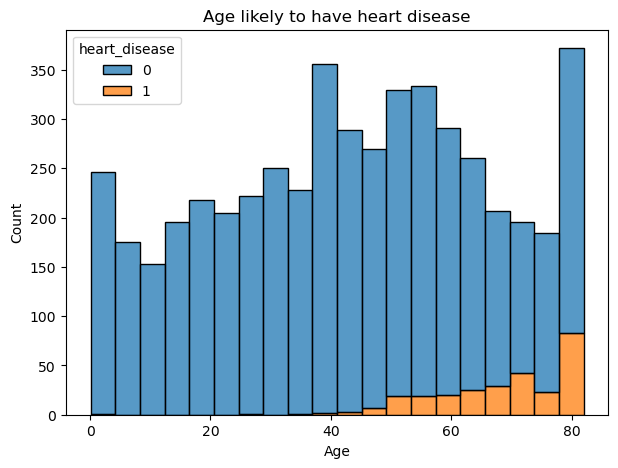

In [38]:
plt.figure(figsize=(7,5))
sns.histplot(data=df,x = 'age', hue="heart_disease",multiple = 'stack')
plt.title("Age likely to have heart disease")
plt.xlabel("Age");

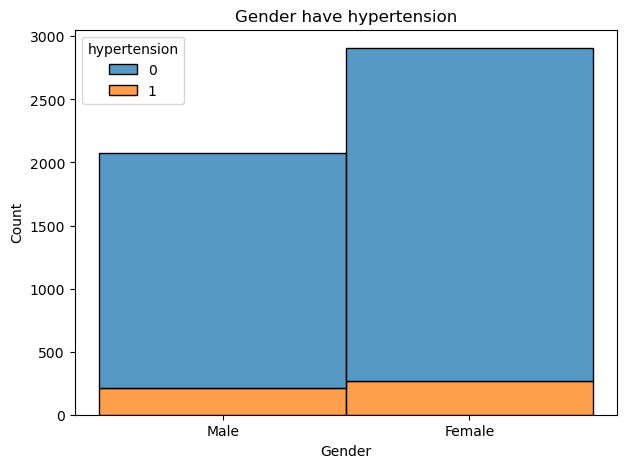

In [50]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="gender", hue="hypertension", multiple="stack")
plt.title("Gender have hypertension")
plt.xlabel("Gender");

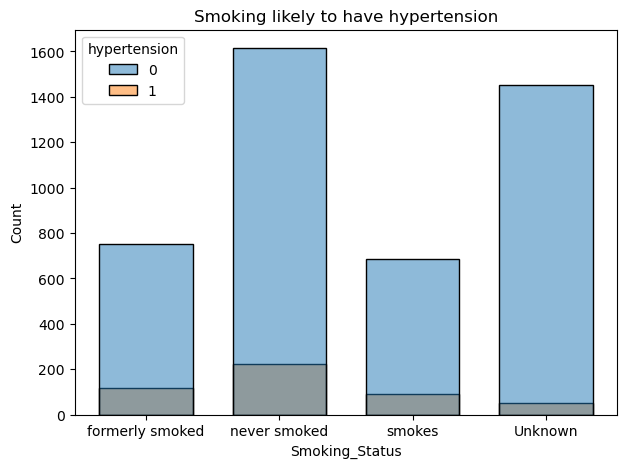

In [44]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='smoking_status',hue = 'hypertension',shrink = 0.7)
plt.title("Smoking likely to have hypertension")
plt.xlabel("Smoking_Status");

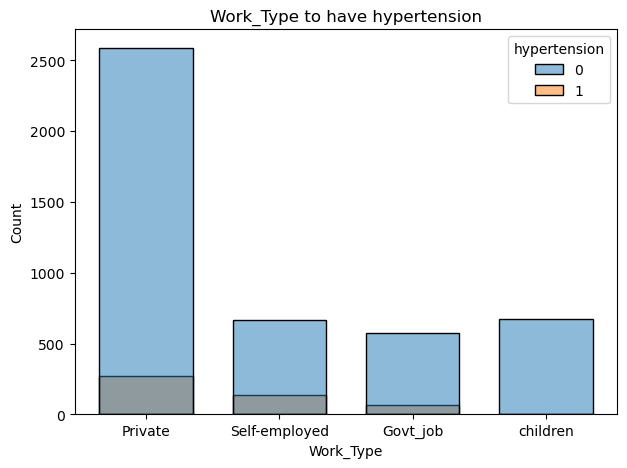

In [48]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='work_type',hue = 'hypertension',shrink = 0.7)
plt.title("Work_Type to have hypertension")
plt.xlabel("Work_Type");

In [64]:
le=LabelEncoder()
list=['ever_married','work_type', 'gender', 'smoking_status','Residence_type']
for i in list:
    df[i]=le.fit_transform(df[i])

In [74]:
#df = df.drop(columns=['ever_married','work_type', 'gender','Residence_type'], axis=1)

In [76]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,228.69,36.6,formerly smoked,1
1,80.0,0,1,105.92,32.5,never smoked,1
2,49.0,0,0,171.23,34.4,smokes,1
3,79.0,1,0,174.12,24.0,never smoked,1
4,81.0,0,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,formerly smoked,0
4977,40.0,0,0,191.15,31.1,smokes,0
4978,45.0,1,0,95.02,31.8,smokes,0
4979,40.0,0,0,83.94,30.0,smokes,0


In [80]:
#df.to_csv(r'D:\Final Project\brainstrokeML.csv',index=False)

In [40]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [16]:
X = df.drop(["stroke"],axis=1)
y =df['stroke']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9478260869565217
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Prepare Data for DWH After Staging

In [65]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.026538,0.021485,0.086476,-0.028971,0.065784,-0.004301,0.055796,-0.012093,-0.062666,0.008870
age,-0.026538,1.000000,0.278120,0.264852,0.677137,-0.415935,0.017155,0.236763,0.373703,0.265623,0.246478
hypertension,0.021485,0.278120,1.000000,0.111974,0.164534,-0.061618,-0.004755,0.170028,0.158762,0.110045,0.131965
heart_disease,0.086476,0.264852,0.111974,1.000000,0.114765,-0.036943,0.002125,0.166847,0.060926,0.048093,0.134610
ever_married,-0.028971,0.677137,0.164534,0.114765,1.000000,-0.406439,0.008191,0.150724,0.371690,0.262384,0.108398
work_type,0.065784,-0.415935,-0.061618,-0.036943,-0.406439,1.000000,-0.003524,-0.059658,-0.382418,-0.356738,-0.041835
Residence_type,-0.004301,0.017155,-0.004755,0.002125,0.008191,-0.003524,1.000000,0.001346,0.013185,0.010209,0.016494
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,0.150724,-0.059658,0.001346,1.000000,0.186348,0.064089,0.133227
bmi,-0.012093,0.373703,0.158762,0.060926,0.371690,-0.382418,0.013185,0.186348,1.000000,0.243111,0.056926
smoking_status,-0.062666,0.265623,0.110045,0.048093,0.262384,-0.356738,0.010209,0.064089,0.243111,1.000000,0.027463


In [67]:
dff = df.copy()

In [69]:
X = df.drop(["stroke","gender","work_type","Residence_type"],axis=1)
y =df['stroke']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9478260869565217
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 